In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV

# модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# стандартизация
from sklearn.preprocessing import StandardScaler

# метрики
from sklearn.metrics import (r2_score)

# кодирование признаков
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


В вашем распоряжении набор данных о качестве сна Sleep_health_and_lifestyle_dataset.csv.
* ваша задача — подготовить данные к моделированию, сгенерировать новые признаки, 
* применить методы отбора признаков для улучшения качества предсказательной модели
* подобрать оптимальные гиперпараметры для модели регрессии.

In [2]:
df_sleep_health = pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')
df_sleep_health.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


### 1. Предобработка данных:
* Очистите данные от пропусков и аномалий.
* Преобразуйте категориальные переменные с помощью One-Hot Encoding или Label Encoding.

Информация о наборе данных:  
`Person ID: ` Идентификатор для каждого человека.  
`Gender:` Пол человека (мужчины/женщины).  
`Age:` Возраст человека в годах.  
`Occupation: ` Род занятий или профессия человека.  
`Sleep Duration (hours):` Количество часов, которые человек спит в сутки.  
`Quality of Sleep (scale: 1-10): `Субъективная оценка качества сна в диапазоне от 1 до 10.  
`Physical Activity Level (minutes/day):` Количество минут, которые человек ежедневно уделяет физической активности.  
`Stress Level (scale: 1-10):` Субъективная оценка уровня стресса, испытываемого человеком, в диапазоне от 1 до 10.  
`BMI Category: ` Категория ИМТ человека (например, недостаточный вес, нормальный, избыточный вес с избыточной массой тела).  
`Blood Pressure (systolic/diastolic): `Измерение артериального давления человека, показывающее превышение систолического давления над диастолическим давлением.  
`Heart Rate (bpm):` Частота сердечных сокращений человека в состоянии покоя в ударах в минуту.  
`Daily Steps:`  Количество шагов, которые человек делает за день.  
`Sleep Disorder:` Наличие или отсутствие у человека нарушений сна (отсутствие таковых, бессонница, апноэ во сне).

In [3]:
df_sleep_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


DataFrame содержит 374 записи, индексированные от 0 до 373.
- Всего в DataFrame 13 столбцов с различными типами данных:  
  - `Person ID:` целочисленный тип (int64), каждое значение в столбце непустое (non-null), представляет собой уникальный идентификатор человека.  
  - `Gender:` тип данных object, возможно, содержит строки, указывающие на пол. Все значения непустые.  
  - `Age:` целочисленный тип (int64), содержит возраст участников, все значения непустые.
  - `Occupation:` тип данных object, предположительно содержит информацию о профессии участников, все значения непустые.
  - `Sleep Duration:` тип данных с плавающей запятой (float64), отражает продолжительность сна, все значения непустые.
  - `Quality of Sleep:` целочисленный тип (int64), представляет качество сна, возможно, в некоторой шкале оценок, все значения непустые.
  - `Physical Activity Level:` целочисленный тип (int64), описывает уровень физической активности, все значения непустые.
  - `Stress Level:` целочисленный тип (int64), показывает уровень стресса, все значения непустые.
  - `BMI Category:` тип данных object, возможно, содержит категории индекса массы тела, все значения непустые.
  - `Blood Pressure:` тип данных object, содержит данные о давлении крови, все значения непустые.
  - `Heart Rate:` целочисленный тип (int64), отражает показатели сердечного ритма, все значения непустые.
  - `Daily Steps:` целочисленный тип (int64), показывает количество шагов в день, все значения непустые.
  - `Sleep Disorder:` тип данных object, содержит информацию о наличии расстройств сна, только 155 значений непусты, что означает, что у остальных участников либо нет расстройства сна, либо данная информация не была предоставлена.

In [4]:
df_sleep_health.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
# Обработка признака Blood Pressure
df_sleep_health[['Systolic', 'Diastolic']] = df_sleep_health['Blood Pressure'].str.split('/', expand=True)
df_sleep_health['Systolic'] = pd.to_numeric(df_sleep_health['Systolic'])
df_sleep_health['Diastolic'] = pd.to_numeric(df_sleep_health['Diastolic'])

# Формула MBP для определения среднего значения артериального давления
df_sleep_health['MBP'] = df_sleep_health['Diastolic'] + (df_sleep_health['Systolic'] - df_sleep_health['Diastolic']) / 3

In [6]:
df_sleep_health['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [7]:
# Будем счтитать, что у остальных участников нет расстройства сна
df_sleep_health['Sleep Disorder'].fillna('No Disorder', inplace=True)

In [8]:
df_sleep_health['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [9]:
# применим Mapping
map_dict = {'Insomnia' : 1, # Бессонница
            'Sleep Apnea' : 2, # Апноэ во сне
            'No Disorder': 3} # Нет нарушения

df_sleep_health['Sleep Disorder'] = df_sleep_health['Sleep Disorder'].map(map_dict).astype('int')

In [10]:
df_sleep_health['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [11]:
# произведем замену Мужчины - 0, Женщины - 1
df_sleep_health['Gender'] = df_sleep_health['Gender'].replace({'Male': 0, 'Female': 1}).astype('int')

In [12]:
df_sleep_health['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [13]:
df_sleep_health.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,MBP
0,1,0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,3,126,83,97.333333
1,2,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,3,125,80,95.000000
2,3,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,3,125,80,95.000000
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2,140,90,106.666667
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2,140,90,106.666667


In [14]:
# применим get_dummes к столбцам Occupation, BMI Category
for cat_colname in df_sleep_health[['Occupation', 'BMI Category']]:
    df_sleep_health = pd.concat([df_sleep_health, pd.get_dummies(df_sleep_health[cat_colname], prefix=cat_colname)], axis=1)

In [15]:
df_sleep_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Gender                           374 non-null    int64  
 2   Age                              374 non-null    int64  
 3   Occupation                       374 non-null    object 
 4   Sleep Duration                   374 non-null    float64
 5   Quality of Sleep                 374 non-null    int64  
 6   Physical Activity Level          374 non-null    int64  
 7   Stress Level                     374 non-null    int64  
 8   BMI Category                     374 non-null    object 
 9   Blood Pressure                   374 non-null    object 
 10  Heart Rate                       374 non-null    int64  
 11  Daily Steps                      374 non-null    int64  
 12  Sleep Disorder        

In [16]:
df_sleep_health.describe().round(3)

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,MBP
count,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000
mean,187.500,0.495,42.184,7.132,7.313,59.171,5.385,70.166,6816.845,2.380,128.553,84.650,99.284
std,108.109,0.501,8.673,0.796,1.197,20.831,1.775,4.136,1617.916,0.806,7.748,6.162,6.647
min,1.000,0.000,27.000,5.800,4.000,30.000,3.000,65.000,3000.000,1.000,115.000,75.000,88.333
25%,94.250,0.000,35.250,6.400,6.000,45.000,4.000,68.000,5600.000,2.000,125.000,80.000,95.000
50%,187.500,0.000,43.000,7.200,7.000,60.000,5.000,70.000,7000.000,3.000,130.000,85.000,100.000
75%,280.750,1.000,50.000,7.800,8.000,75.000,7.000,72.000,8000.000,3.000,135.000,90.000,105.000
max,374.000,1.000,59.000,8.500,9.000,90.000,8.000,86.000,10000.000,3.000,142.000,95.000,110.000


In [17]:
# средняя примерно равна медиане по всем принзнакам, это сввидетельствует об отсутствии выбросов

In [18]:
df_sleep_health.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,...,False,False,False,False,True,False,False,False,False,True
1,2,0,28,Doctor,6.2,6,60,8,Normal,125/80,...,False,False,False,False,False,False,True,False,False,False
2,3,0,28,Doctor,6.2,6,60,8,Normal,125/80,...,False,False,False,False,False,False,True,False,False,False
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,...,False,True,False,False,False,False,False,False,True,False
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,...,False,True,False,False,False,False,False,False,True,False


### Отберем признаки и сохраним датасет

In [19]:
df_sleep_health.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic', 'MBP',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight'],
      dtype='object')

In [20]:
df = df_sleep_health.drop(['Occupation', 'BMI Category', 'Blood Pressure'], axis=1)

In [21]:
df.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,0,27,6.1,6,42,6,77,4200,3,...,False,False,False,False,True,False,False,False,False,True
1,2,0,28,6.2,6,60,8,75,10000,3,...,False,False,False,False,False,False,True,False,False,False
2,3,0,28,6.2,6,60,8,75,10000,3,...,False,False,False,False,False,False,True,False,False,False
3,4,0,28,5.9,4,30,8,85,3000,2,...,False,True,False,False,False,False,False,False,True,False
4,5,0,28,5.9,4,30,8,85,3000,2,...,False,True,False,False,False,False,False,False,True,False


In [22]:
df.to_csv('data/df.csv', encoding='utf8')

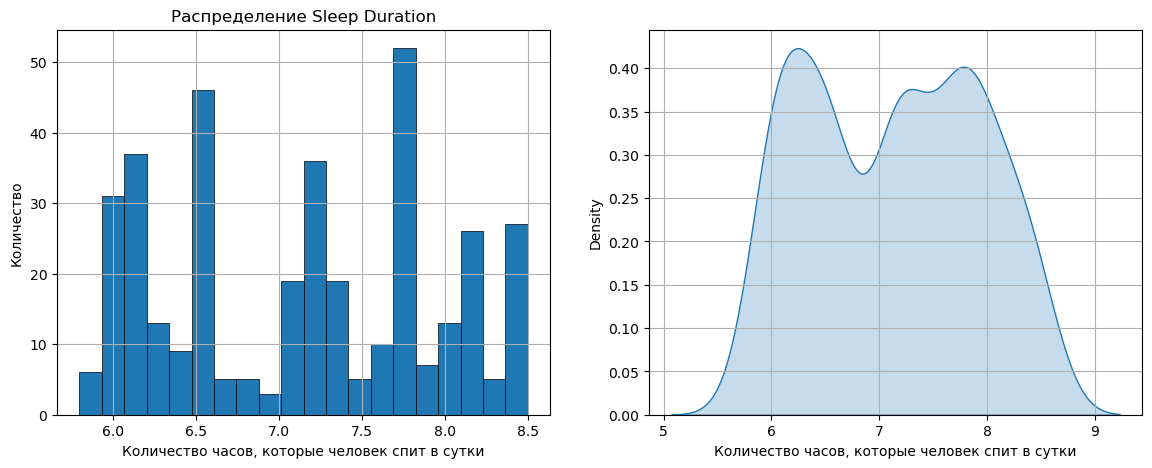

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df['Sleep Duration'].hist(density=False, bins=20, linewidth=0.5, edgecolor='k')
plt.title('Распределение Sleep Duration')
plt.ylabel('Количество')
plt.xlabel('Количество часов, которые человек спит в сутки')
# plt.grid(False)
plt.subplot(122)
sns.kdeplot(df['Sleep Duration'], shade=True, legend=False)
plt.xlabel('Количество часов, которые человек спит в сутки')
plt.grid()

plt.show()

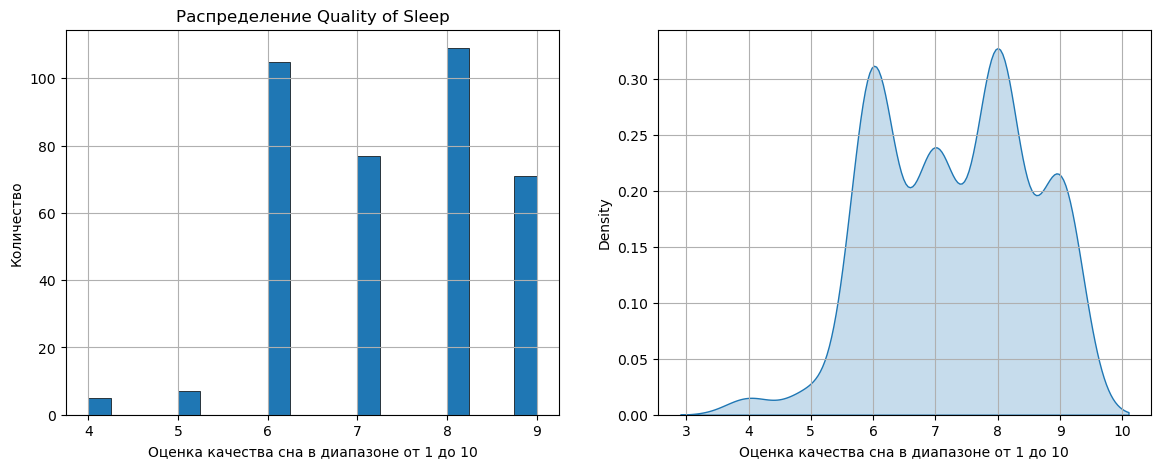

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df['Quality of Sleep'].hist(density=False, bins=20, linewidth=0.5, edgecolor='k')
plt.title('Распределение Quality of Sleep')
plt.ylabel('Количество')
plt.xlabel('Оценка качества сна в диапазоне от 1 до 10')
# plt.grid(False)
plt.subplot(122)
sns.kdeplot(df['Quality of Sleep'], shade=True, legend=False)
plt.xlabel('Оценка качества сна в диапазоне от 1 до 10')
plt.grid()

plt.show()

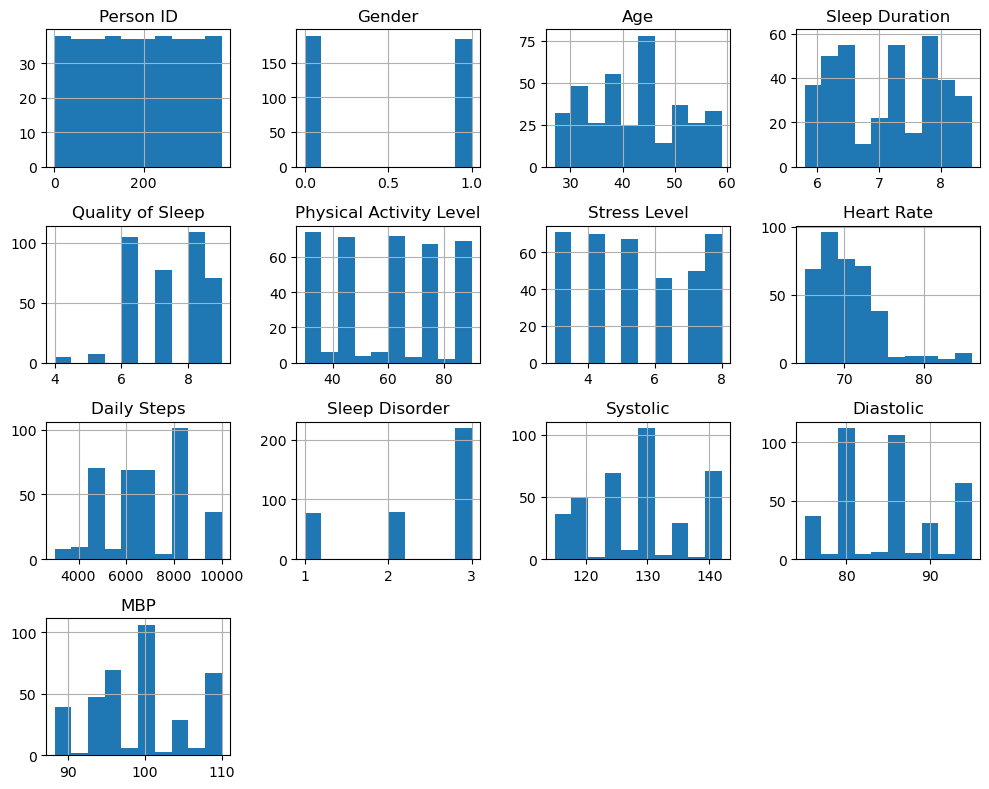

In [25]:
# Генерируем гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(10, 8), bins=10)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.grid(alpha=0.3)
plt.show()

### 2. Генерация новых признаков:
* Создайте комбинированные признаки, которые могут помочь улучшить модель.
* Используйте полиномиальные признаки для числовых переменных.

### Построение модели

In [26]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic', 'MBP',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight'],
      dtype='object')

In [27]:
X = df.drop(['Quality of Sleep', 'Person ID'], axis=1)
#X = df[['Physical Activity Level','Heart Rate']]
Y = df['Quality of Sleep']
#X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [28]:
%%time
gr_boost_model = GradientBoostingRegressor()
gr_boost_model.fit(X_train, y_train)

print(f'r2_score_trian: {gr_boost_model.score(X_train, y_train)}')
print(f'r2_score_test: {gr_boost_model.score(X_test, y_test)}')

r2_score_trian: 0.999586651056977
r2_score_test: 0.9929464124230987
CPU times: user 84.9 ms, sys: 3.92 ms, total: 88.8 ms
Wall time: 87.1 ms


In [29]:
# модель выглядит переобученной

### 3. Отбор признаков:
* Примените несколько методов отбора признаков (например, RFE, SelectKBest).
* Сравните качество модели до и после отбора признаков.

In [30]:
from sklearn.feature_selection import RFE
# Создаем RFE модель
rfe = RFE(estimator=gr_boost_model, n_features_to_select=12)
rfe = rfe.fit(X, Y)

# Показываем какие признаки выбраны
selected_features = pd.DataFrame({
    'Feature': X.columns,  # Здесь X.columns должен содержать названия столбцов, использованных для X
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking'))

                            Feature  Ranking
12                Occupation_Doctor        1
1                               Age        1
2                    Sleep Duration        1
3           Physical Activity Level        1
4                      Stress Level        1
5                        Heart Rate        1
6                       Daily Steps        1
22              BMI Category_Normal        1
8                          Systolic        1
9                         Diastolic        1
11            Occupation_Accountant        1
21               Occupation_Teacher        1
10                              MBP        2
13              Occupation_Engineer        3
25          BMI Category_Overweight        4
0                            Gender        5
23       BMI Category_Normal Weight        6
14                Occupation_Lawyer        7
15               Occupation_Manager        8
24               BMI Category_Obese        9
19             Occupation_Scientist       10
16        

In [31]:
top_features = selected_features.sort_values(by='Ranking')[:8]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]

In [32]:
%%time
gr_boost_model = GradientBoostingRegressor(random_state=42)
gr_boost_model.fit(X_train_selected, y_train)

print(f'r2_score_trian: {gr_boost_model.score(X_train_selected, y_train)}')
print(f'r2_score_test: {gr_boost_model.score(X_test_selected, y_test)}')

r2_score_trian: 0.9991115094535423
r2_score_test: 0.9904271839565976
CPU times: user 76.3 ms, sys: 958 µs, total: 77.3 ms
Wall time: 76.4 ms


### 4. Подбор гиперпараметров:
* Используйте GridSearchCV или RandomizedSearchCV для настройки параметров вашей модели регрессии.
* Оцените, как изменение гиперпараметров влияет на качество предсказаний.

In [33]:
%%time

# Подбор гиперпараметров для улучшения результатов модели GradientBoostingRegressor

params = {'n_estimators': [50, 100, 200, 400],
          'max_depth': [3, 5, 7, 10]}

gs_gr_boost_model = GridSearchCV(gr_boost_model, 
                  params,
                  scoring='r2',
                  cv=KFold(n_splits=5, # колич. разбиений/итераций в кросс-валидации
                           random_state=42,
                           shuffle=True),
                  n_jobs=-1
                 )

gs_gr_boost_model.fit(X_train_selected, y_train)

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9

CPU times: user 323 ms, sys: 220 ms, total: 543 ms
Wall time: 3.36 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [34]:
gs_gr_boost_model.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [35]:
gs_gr_boost_model.best_score_

0.9681867873517721

In [36]:
%%time
gr_boost_model = GradientBoostingRegressor(random_state=42, max_depth=3, n_estimators=50)
gr_boost_model.fit(X_train_selected, y_train)

print(f'r2_score_trian: {gr_boost_model.score(X_train_selected, y_train)}')
print(f'r2_score_test: {gr_boost_model.score(X_test_selected, y_test)}')

r2_score_trian: 0.9961137889617335
r2_score_test: 0.9892650755601876
CPU times: user 44.8 ms, sys: 992 µs, total: 45.8 ms
Wall time: 44.7 ms


In [37]:
print('Важность признаков для модели GradientBoostingRegressor')
feature_importances = pd.DataFrame(zip(gr_boost_model.feature_names_in_, gr_boost_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

Важность признаков для модели GradientBoostingRegressor


,feature_name,importance
2,Sleep Duration,0.760805
4,Stress Level,0.149091
0,Occupation_Doctor,0.033225
5,Heart Rate,0.025434
1,Age,0.017645
6,Daily Steps,0.009283
3,Physical Activity Level,0.003403
7,BMI Category_Normal,0.001114
